# Logistic Regression [Titanic Dataset]


Name : Akshada Tonape         
Roll no : 39

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("titanic.csv")
df.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Analysis

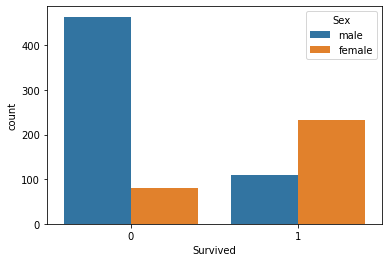

In [2]:
sns.countplot(x='Survived',hue='Sex',data=df)

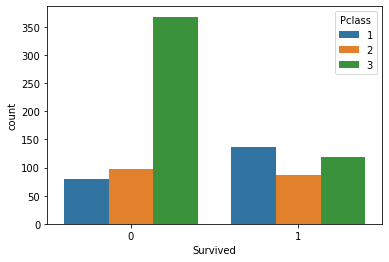

In [3]:
sns.countplot(x='Survived',hue='Pclass',data=df)

In [4]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

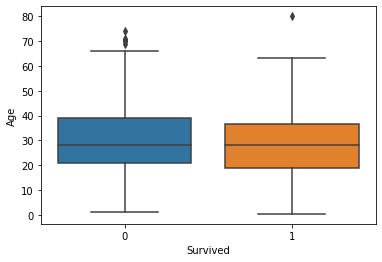

In [5]:
sns.boxplot(x='Survived',y='Age',data=df)

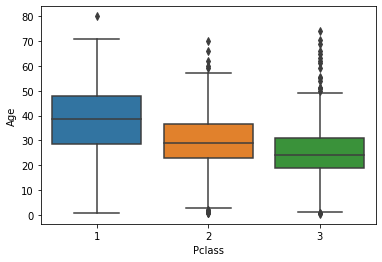

In [6]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [7]:
x=df.drop(['Survived','Name','Siblings/Spouses Aboard','Parents/Children Aboard'],axis=1)

In [8]:
xdf = pd.DataFrame(data=x)
xreplace = xdf.replace('male',0).replace('female',1)
y=df['Survived']

In [9]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(xreplace,y,test_size=0.3,random_state=1)


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model=LogisticRegression()

In [13]:
model.fit(xtrain,ytrain)

C:\Users\Akshada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
predictions=model.predict(xtest)


dtype('int64')

In [15]:
from sklearn.metrics import classification_report

In [16]:
classification_report(ytest,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81       162\n           1       0.71      0.71      0.71       105\n\n    accuracy                           0.78       267\n   macro avg       0.76      0.76      0.76       267\nweighted avg       0.78      0.78      0.78       267\n'

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(ytest,predictions)

array([[132,  30],
       [ 30,  75]], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(ytest,predictions)

0.7752808988764045